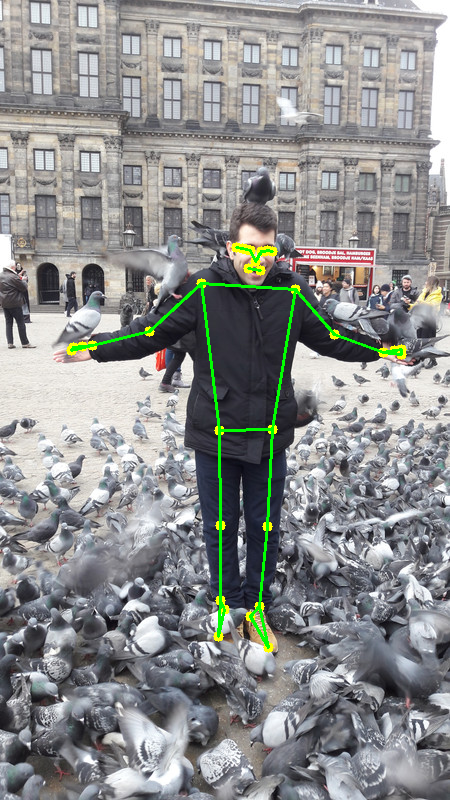

In [1]:
# Install MediaPipe
!pip install mediapipe

import cv2
import numpy as np
import mediapipe as mp
import urllib.request
from google.colab.patches import cv2_imshow


def download_image(url):
    """Download an image from a URL and decode it into OpenCV format."""
    try:
        with urllib.request.urlopen(url) as response:
            data = response.read()
        image_array = np.asarray(bytearray(data), dtype=np.uint8)
        image = cv2.imdecode(image_array, cv2.IMREAD_COLOR)
        return image
    except Exception as e:
        print(f"Error downloading image: {e}")
        return None


def detect_and_draw_pose(image):
    """Detect human pose keypoints using MediaPipe and draw skeleton lines and keypoints."""
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils

    with mp_pose.Pose(static_image_mode=True) as pose:
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)

        if results.pose_landmarks:
            height, width = image.shape[:2]

            # Draw keypoints (yellow circles)
            for landmark in results.pose_landmarks.landmark:
                x = int(landmark.x * width)
                y = int(landmark.y * height)
                cv2.circle(image, (x, y), 5, (0, 255, 255), -1)

            # Draw skeleton (green lines between landmark pairs)
            for connection in mp_pose.POSE_CONNECTIONS:
                start_idx, end_idx = connection
                start = results.pose_landmarks.landmark[start_idx]
                end = results.pose_landmarks.landmark[end_idx]

                x1 = int(start.x * width)
                y1 = int(start.y * height)
                x2 = int(end.x * width)
                y2 = int(end.y * height)

                cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        else:
            print("No pose landmarks detected.")

    return image


def main():
    image_url = 'https://i.postimg.cc/prZf25vG/20180112-134453.jpg'
    image = download_image(image_url)

    if image is not None:
        output_image = detect_and_draw_pose(image)
        cv2_imshow(output_image)
    else:
        print("Failed to load and process image.")


if __name__ == "__main__":
    main()
